# Match Prediction for League of Legend

## Overview
League of Legends is one of the most popular games ever existed, and has one of the most important competitive games. In this game, each team (blue and red) fight to take out the enemy's nexus to win the game. Like all strategy games, we have different objectives in the game which give a certain advantage in the game. This information about these objectives is what will help us make our winning prediction model. To increase our chances to win a game, there are lots of different objectives and events to do, fights to win to increase the power of your champion, as well as winning map terrain by taking down turrets and putting vision on the map.

## Goal

Create a model to predict the outcome of a League of Legends match based upon player performance in prior games. Due to the tremendous amount of data available, I anticipate that a model trained on a sufficiently large dataset can achieve a high accuracy at this prediction task.

## Process

## Objectives for this project includes

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Import for Hypothesis Testing
import scipy.stats as stats

#Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Import our python functions
import wrangle as w
import explore as e
import model as m

from sklearn.metrics import classification_report

# plotting defaults
plt.rc('figure', figsize=(13, 10))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

### Wrangle

hasWon will be our predict if a match is win or not

In [2]:
#Drop columns and split into train, validate and test
df, train, validate, test = w.wrangle_data('hasWon','lol_ranked_games.csv')

In [3]:
#split into X sets and y sets
X_train, y_train, X_validate, y_validate, X_test, y_test = w.split_X_y(train, validate, test, 'hasWon')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242572 entries, 0 to 242571
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   gameId             242572 non-null  int64  
 1   gameDuration       242572 non-null  int64  
 2   hasWon             242572 non-null  int64  
 3   frame              242572 non-null  int64  
 4   goldDiff           242572 non-null  int64  
 5   expDiff            242572 non-null  int64  
 6   champLevelDiff     242572 non-null  float64
 7   isFirstTower       242572 non-null  int64  
 8   isFirstBlood       242572 non-null  int64  
 9   killedFireDrake    242572 non-null  int64  
 10  killedWaterDrake   242572 non-null  int64  
 11  killedAirDrake     242572 non-null  int64  
 12  killedEarthDrake   242572 non-null  int64  
 13  killedElderDrake   242572 non-null  int64  
 14  lostFireDrake      242572 non-null  int64  
 15  lostWaterDrake     242572 non-null  int64  
 16  lo

**Prepare Takeaways:**

- Our data is now clean and ready to use
- hasWon is our target variable to predict matches 
- Split into train, validate, and test sets 


---

### Explore

### Which features are correlated with target variable?

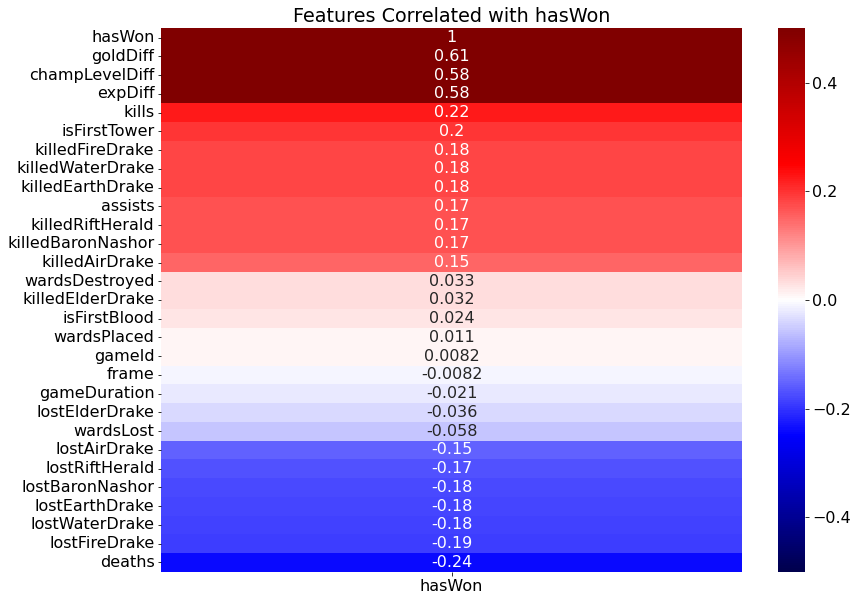

In [5]:
#Create heatmap to see correlation
_, positive_correlate = e.get_heatmap(train, 'hasWon')
None

**Heatmap takeaway: goldDiff, champLevelDiff, expDiff are strongly correlated with hasWon. And other columns (kills, killedFireDrake, assists, etc.) are positive correlated**


### Does killed or lost a baron nashor or rift herald increase or decrease the chance of winning?

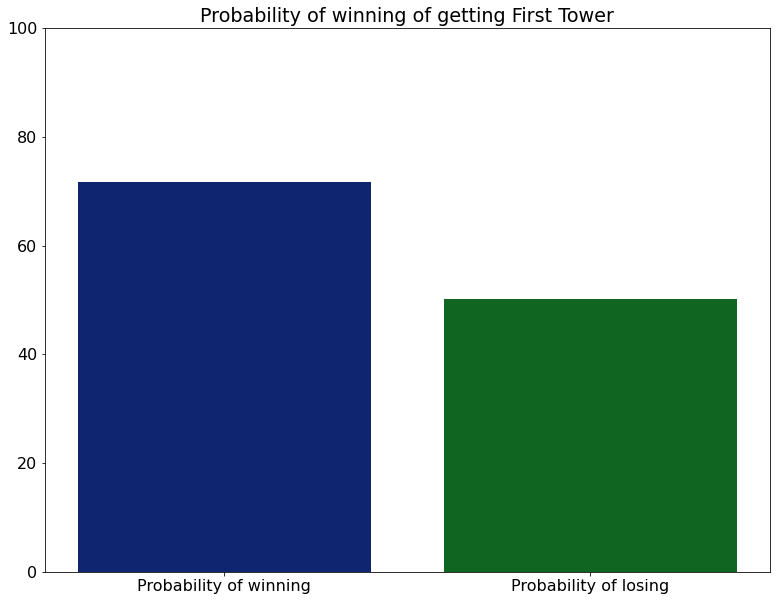

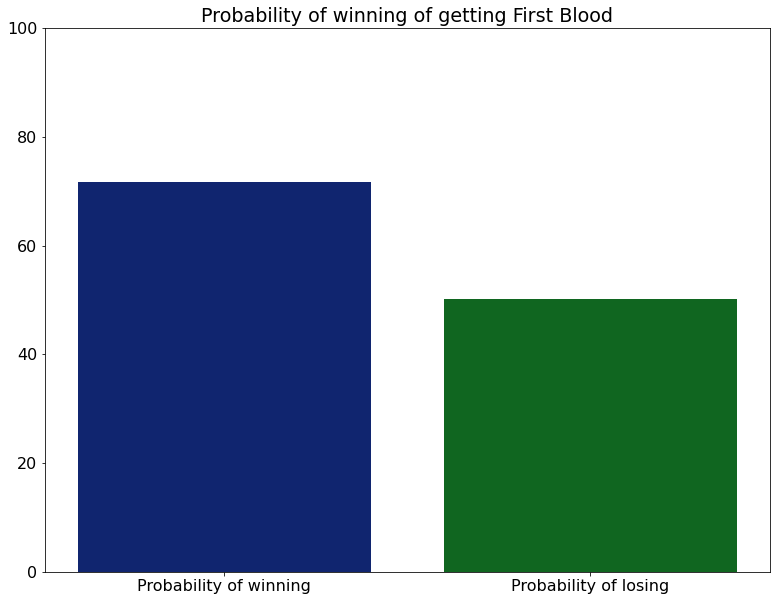

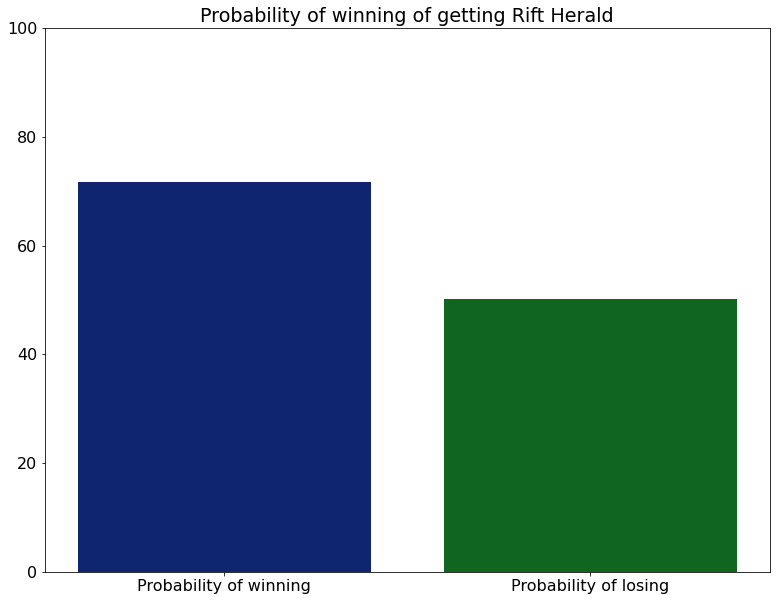

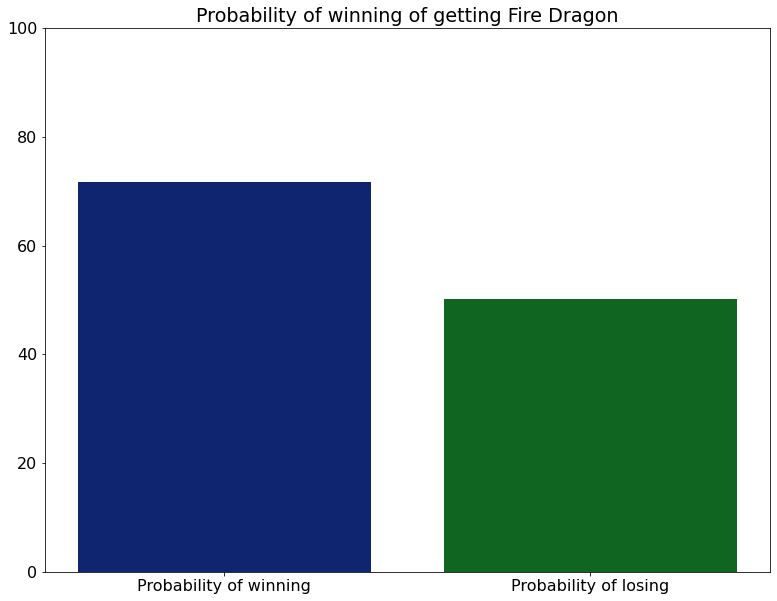

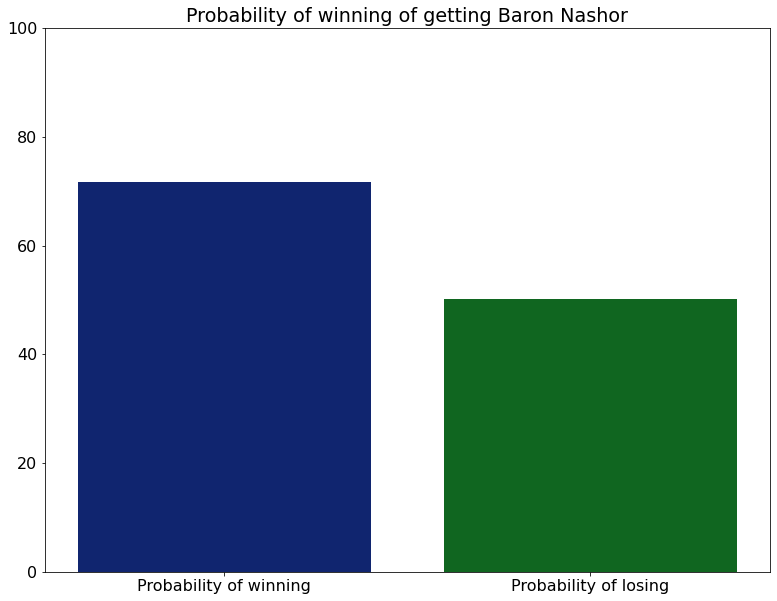

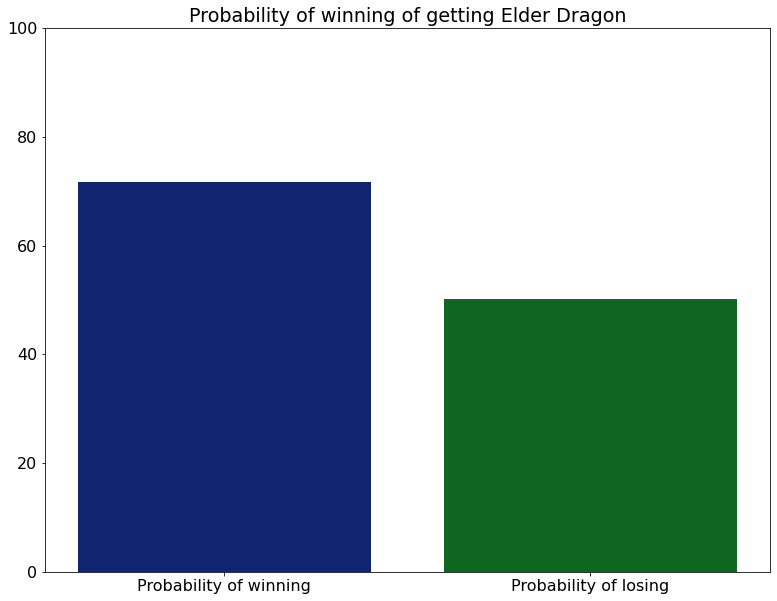

In [6]:
#Create barplot
#Plotting features that get objectives on the map to see our chance of winning
features = ['isFirstTower', 'isFirstBlood','killedRiftHerald', 'killedFireDrake', 'killedBaronNashor', 'killedElderDrake']
e.bar_plot(train,'hasWon', features)

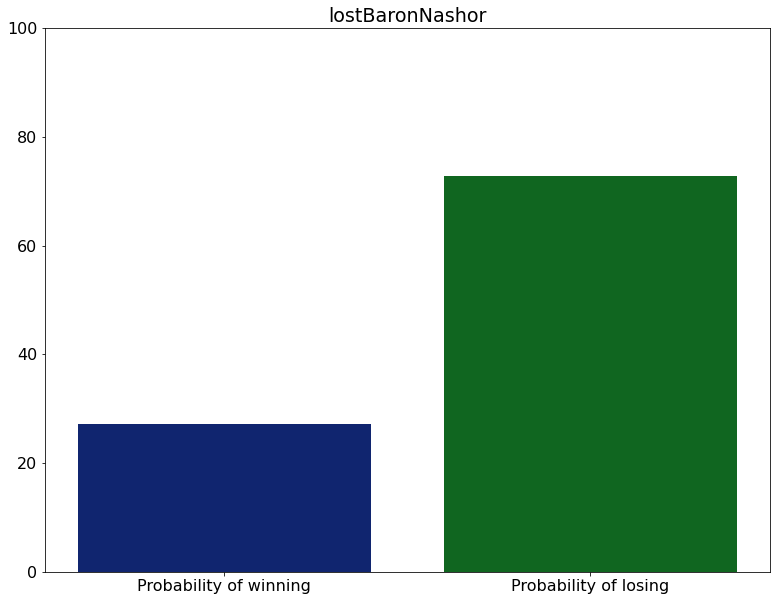

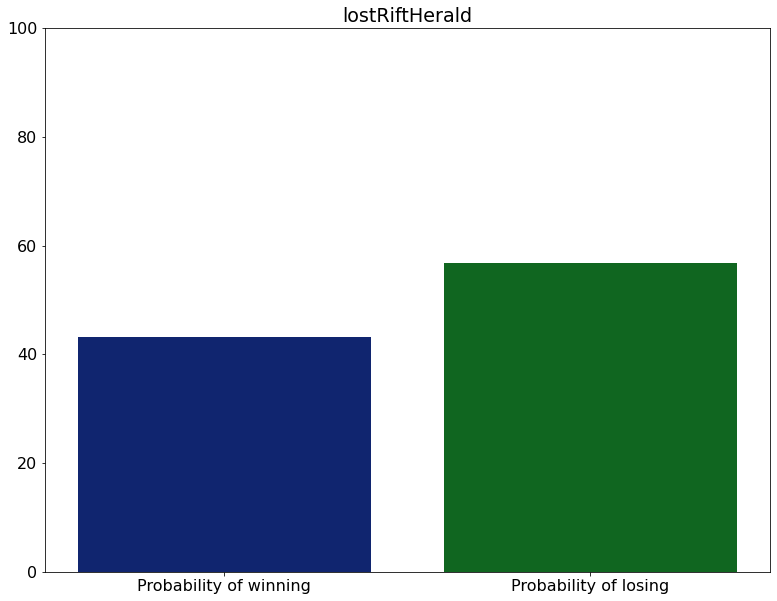

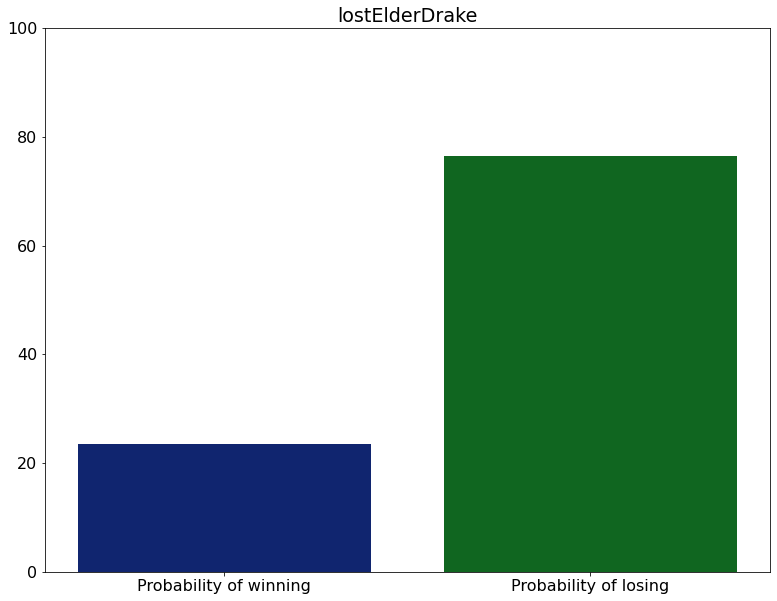

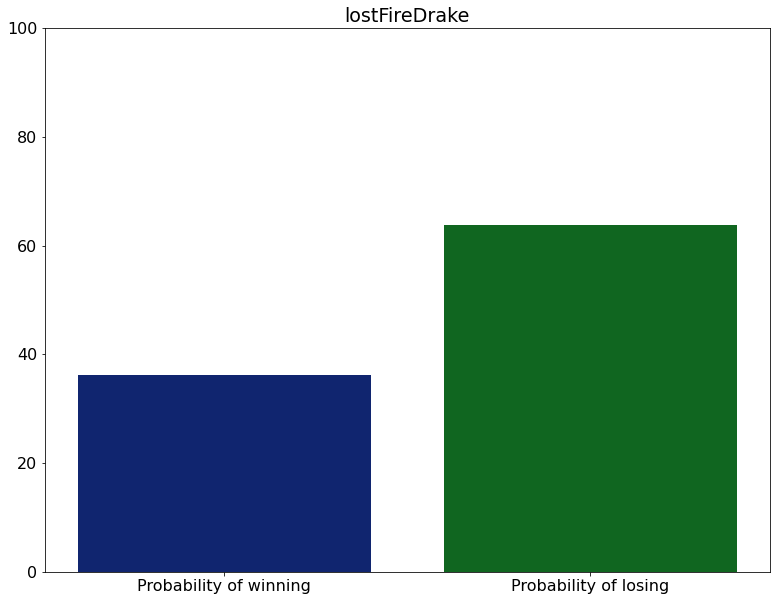

In [7]:
#What about lost the objectives?
features2 = ['lostBaronNashor', 'lostRiftHerald','lostElderDrake', 'lostFireDrake']
e.lost_objectives(train,'hasWon', features2)

**Takeaway: From the bar graphs above, It made sense to see that if we lost objectives we decreases the chance of winning**

---

### Statistical Test

Using chi^2 testing for categorical features to test for independence

---

#### Does the target variable has any difference from selected features?

In [8]:
#Run 6 statistical testing for selected feautres
for i in features:
    e.chi2test(train, 'hasWon', i)

Reject null hypothesis. There is evidence to suggest hasWon and isFirstTower are not independent.
 p-value is 0.0
Reject null hypothesis. There is evidence to suggest hasWon and isFirstBlood are not independent.
 p-value is 2.561803038600623e-16
Reject null hypothesis. There is evidence to suggest hasWon and killedRiftHerald are not independent.
 p-value is 0.0
Reject null hypothesis. There is evidence to suggest hasWon and killedFireDrake are not independent.
 p-value is 0.0
Reject null hypothesis. There is evidence to suggest hasWon and killedBaronNashor are not independent.
 p-value is 0.0
Reject null hypothesis. There is evidence to suggest hasWon and killedElderDrake are not independent.
 p-value is 1.965932404192762e-26


**Stats test takeaway: The test showed that our target variables had some relationship with selected features**

---

### Model

In [9]:
#Establish our baseline
baseline = m.create_baseline(X_train, y_train)

The baseline accuracy for hasWon in all cases on the League of Legends matches Dataset is 50.1874%


In [11]:
#our selected features
x_col = features
y_col= 'hasWon'

In [12]:
#using only our features
X_train, y_train = train[features], train[y_col]

X_validate, y_validate = validate[features], validate[y_col]

X_test, y_test = test[features], test[y_col]

In [13]:
#set parameters, fit to our X and y train, get a score for train and validate sets.
tree, y_pred = m.decision_tree(X_train, X_validate, y_train, y_validate)
m.get_metrics(train, validate, test, x_col, y_col, y_pred, tree)

training score: 61.72%
validate score: 61.47%

    The accuracy for our model is 0.6172
    The True Positive Rate is 0.601, The False Positive Rate is 0.367,
    The True Negative Rate is 0.633, and the False Negative Rate is 0.399
    


,precision,recall,f1-score,support
0,0.615280,0.633042,0.624035,68174.000000
1,0.619206,0.601197,0.610069,67665.000000
accuracy,0.617179,0.617179,0.617179,0.617179
macro avg,0.617243,0.617119,0.617052,135839.000000
weighted avg,0.617236,0.617179,0.617078,135839.000000


In [14]:
#Report for decision tree
m.decision_tree_score(baseline, X_train, y_train, y_pred)

Scores for Decision Tree!
---------------------------
Baseline score is 0.502
accuracy score is 0.617
precision score is 0.62
recall score is 0.62


In [15]:
#set parameters, fit to our X and y train, get a score for train and validate sets.
rf, y_pred = m.random_forest(X_train, X_validate, y_train, y_validate)
m.get_metrics(train, validate, test, x_col, y_col, y_pred, rf)

training score: 61.79%
validate score: 61.52%

    The accuracy for our model is 0.6179
    The True Positive Rate is 0.616, The False Positive Rate is 0.38,
    The True Negative Rate is 0.62, and the False Negative Rate is 0.384
    


,precision,recall,f1-score,support
0,0.619189,0.619752,0.619471,68174.000000
1,0.616541,0.615976,0.616258,67665.000000
accuracy,0.617871,0.617871,0.617871,0.617871
macro avg,0.617865,0.617864,0.617864,135839.000000
weighted avg,0.617870,0.617871,0.617870,135839.000000


In [16]:
#Report for random forest
m.random_forest_score(baseline, X_train, y_train, y_pred)

Scores for Random Forest!
---------------------------
Baseline score is 0.502
accuracy score is 0.618
precision score is 0.62
recall score is 0.62


In [17]:
#set parameters, fit to our X and y train, get a score for train and validate sets.
knn, y_pred = m.kn_neigh(X_train, X_validate, y_train, y_validate)
m.get_metrics(train, validate, test, x_col, y_col, y_pred, knn)

training score: 60.08%
validate score: 59.68%

    The accuracy for our model is 0.6008
    The True Positive Rate is 0.407, The False Positive Rate is 0.207,
    The True Negative Rate is 0.793, and the False Negative Rate is 0.593
    


,precision,recall,f1-score,support
0,0.574016,0.793396,0.666108,68174.000000
1,0.661500,0.406783,0.503775,67665.000000
accuracy,0.600814,0.600814,0.600814,0.600814
macro avg,0.617758,0.600090,0.584942,135839.000000
weighted avg,0.617594,0.600814,0.585246,135839.000000


In [18]:
#Report for K-nearest-neighbors
m.knn_score(baseline, X_train, y_train, y_pred)

---------------------------
Baseline score is 0.502
accuracy score is 0.601
precision score is 0.62
recall score is 0.6


---

### Test

In [20]:
#How our best model (random forest) peform on unseen data
actual_test = y_test
predicted_test = tree.predict(X_test)
print(classification_report(actual_test, predicted_test))
print(f'Baseline score is {baseline*100}%')
print(f'training score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')
print(f'test score: {rf.score(X_test, y_test):.2%}')

              precision    recall  f1-score   support

           0       0.61      0.63      0.62     24348
           1       0.62      0.60      0.61     24167

    accuracy                           0.62     48515
   macro avg       0.62      0.62      0.62     48515
weighted avg       0.62      0.62      0.62     48515

Baseline score is 50.187354147188955%
training score: 61.79%
validate score: 61.52%
test score: 61.74%


---